In [79]:
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import sqrt
import pandas as pd

In [80]:
df_x_train = pd.read_csv('data/only_4/only_4_x_train.csv')
df_x_train.set_index('cell_line', inplace=True)
df_x_train = df_x_train[['1877', '4854', '2200', '89870', '121551', '29995', '29126', '57016', '4318', '2627', '6004', '25825', '10897', '348751', '221', '22993', '2335', '10211', '409', '133957', '221458', '5654', '130612', '85236', '28977', '55170', '55778', '84332', '8792', '6423', '23127', '79811', '3758', '51203', '8942', '10243', '4058', '9654', '3487', '57007', '932', '200916', '8313', '9543', '2908', '66035', '6695', '6632', '2990', '284459', '7975', '402160', '55094', '10101', '3292', '79817', '257019', '23198', '55316', '6389', '2550', '91875', '114769', '6484', '8764', '83987', '5360', '215', '113189', '92737', '89941', '54805', '253260', '9576', '284099', '27146', '22849', '51091', '162968', '54749', '55769', '1728', '6414', '5810', '7045', '11238', '11218', '54947', '4776', '134429', '257144', '7766', '8905', '6887', '165186', '196051', '3134', '9997', '4140', '6843', '116842', '970', '51141', '10449', '8661', '159371', '79083', '170463', '5920', '5137', '9133', '80319', '9196', '10016', '22843', '64062', '65010', '23363', '147746', '7277', '11151', '7128', '23424', '2354', '63027', '112495', '11236', '157769', '374393', '9950', '8673', '22847', '220', '5054', '976', '1152', '6373', '23029', '10554', '8857', '23743', '64850', '54959', '9669', '57804', '11145', '145508', '23371', '118611', '51237', '2188', '121642', '11138', '84986', '10011', '23234', '3783', '253650', '10794', '63875', '10265', '56131', '3299', '284612', '441151', '79847', '1280', '4643', '285598', '79705', '5071', '1791', '6835', '26261', '84513', '81844', '3108', '79132', '6482', '81502', '79000', '7070', '201161', '11259', '84458', '57162', '5098', '8355', '55249', '23176', '7145', '8424', '285521', '124842', '3702', '57585', '23025', '1944', '114823', '284359', '26022', '56243', '25803', '80119', '51562', '56925', '7436', '1307', '55351', '55920', '79943', '79979', '7556', '51026', '84527', '153657', '1294', '163071', '8487', '29108', '7036', '57821', '2045', '96764', '834', '90226', '1601', '3490', '285613', '116285', '8607', '221491', '91746', '91355', '80823', '3785', '7173', '54103', '79570', '7494', '199731', '10384', '55795', '4013', '54552', '23401', '2547', '51522', '79412', '54811', '4675', '81031', '7324', '55692', '27122', '5291', '55344', '10046', '54802', '8887', '65117', '8564', '11014', '6502', '26960', '131566', '64858', '92912', '55630', '3675', '51150', '57549', '11198', '10548', '23328', '7130', '2177', '528', '19', '196740', '8341', '116362', '6494', '51754', '5122', '6256', '5138', '3012', '3082', '1837', '9445', '2558', '9217', '116113', '81559', '4924', '5961', '54961', '3122', '10397', '9360', '54514', '283726', '23546', '150223', '55119', '89953', '4606', '6489', '55127', '5565', '145389', '79369', '22997', '81688', '80235', '84722', '2212', '8038', '6832', '54704', '6583', '23315', '6992', '1388']]

In [81]:

df_x_test = pd.read_csv('data/only_4/only_4_x_test.csv')
df_x_test.set_index('cell_line', inplace=True)
df_x_test = df_x_test[['1877', '4854', '2200', '89870', '121551', '29995', '29126', '57016', '4318', '2627', '6004', '25825', '10897', '348751', '221', '22993', '2335', '10211', '409', '133957', '221458', '5654', '130612', '85236', '28977', '55170', '55778', '84332', '8792', '6423', '23127', '79811', '3758', '51203', '8942', '10243', '4058', '9654', '3487', '57007', '932', '200916', '8313', '9543', '2908', '66035', '6695', '6632', '2990', '284459', '7975', '402160', '55094', '10101', '3292', '79817', '257019', '23198', '55316', '6389', '2550', '91875', '114769', '6484', '8764', '83987', '5360', '215', '113189', '92737', '89941', '54805', '253260', '9576', '284099', '27146', '22849', '51091', '162968', '54749', '55769', '1728', '6414', '5810', '7045', '11238', '11218', '54947', '4776', '134429', '257144', '7766', '8905', '6887', '165186', '196051', '3134', '9997', '4140', '6843', '116842', '970', '51141', '10449', '8661', '159371', '79083', '170463', '5920', '5137', '9133', '80319', '9196', '10016', '22843', '64062', '65010', '23363', '147746', '7277', '11151', '7128', '23424', '2354', '63027', '112495', '11236', '157769', '374393', '9950', '8673', '22847', '220', '5054', '976', '1152', '6373', '23029', '10554', '8857', '23743', '64850', '54959', '9669', '57804', '11145', '145508', '23371', '118611', '51237', '2188', '121642', '11138', '84986', '10011', '23234', '3783', '253650', '10794', '63875', '10265', '56131', '3299', '284612', '441151', '79847', '1280', '4643', '285598', '79705', '5071', '1791', '6835', '26261', '84513', '81844', '3108', '79132', '6482', '81502', '79000', '7070', '201161', '11259', '84458', '57162', '5098', '8355', '55249', '23176', '7145', '8424', '285521', '124842', '3702', '57585', '23025', '1944', '114823', '284359', '26022', '56243', '25803', '80119', '51562', '56925', '7436', '1307', '55351', '55920', '79943', '79979', '7556', '51026', '84527', '153657', '1294', '163071', '8487', '29108', '7036', '57821', '2045', '96764', '834', '90226', '1601', '3490', '285613', '116285', '8607', '221491', '91746', '91355', '80823', '3785', '7173', '54103', '79570', '7494', '199731', '10384', '55795', '4013', '54552', '23401', '2547', '51522', '79412', '54811', '4675', '81031', '7324', '55692', '27122', '5291', '55344', '10046', '54802', '8887', '65117', '8564', '11014', '6502', '26960', '131566', '64858', '92912', '55630', '3675', '51150', '57549', '11198', '10548', '23328', '7130', '2177', '528', '19', '196740', '8341', '116362', '6494', '51754', '5122', '6256', '5138', '3012', '3082', '1837', '9445', '2558', '9217', '116113', '81559', '4924', '5961', '54961', '3122', '10397', '9360', '54514', '283726', '23546', '150223', '55119', '89953', '4606', '6489', '55127', '5565', '145389', '79369', '22997', '81688', '80235', '84722', '2212', '8038', '6832', '54704', '6583', '23315', '6992', '1388']]

In [82]:
df_y_train = pd.read_csv('data/only_4/only_4_y_train.csv')
df_y_train.set_index('cell_line', inplace=True)
df_y_train.head()

,SF
cell_line,
NCIH1568-4,0.333490
SCC9-4,0.269735
HCC1428-4,0.395390
U2OS-4,0.367179
LU99-4,0.365677


In [83]:
df_y_test = pd.read_csv('data/only_4/only_4_y_test.csv')
df_y_test.set_index('cell_line', inplace=True)

In [84]:
xtrain, x_val, ytrain, y_val = train_test_split(df_x_train, df_y_train, test_size=0.1, random_state=42)

In [85]:
bay_ridge = BayesianRidge()

In [86]:
bay_ridge.fit(xtrain, ytrain)

C:\Users\Udi\Documents\GitHub\RadiationProject\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [87]:
score=bay_ridge.score(df_x_test, df_y_test)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 0.15


In [88]:
ypred = bay_ridge.predict(df_x_test)
mse = mean_squared_error(df_y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 0.05


In [89]:
print("RMSE: %.2f" % sqrt(mse))

RMSE: 0.23


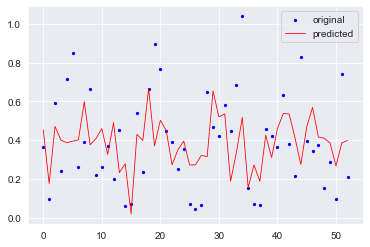

In [90]:
x_ax = range(len(df_y_test))
plt.scatter(x_ax, df_y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()